### Data and Package Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trips_hourly_engineered = pd.read_pickle('../00_data/trips_hourly_engineered.pkl')

### Weekday

In [3]:
#create column for total of starting and ongoing trips per hour
trips_hourly_engineered["ongoing_trips_total"] = trips_hourly_engineered["starting_trips"] + trips_hourly_engineered["ongoing_trips_prev"]
trips_hourly_engineered[trips_hourly_engineered["precip"] != 0]

,starting_trips,ongoing_trips_prev,in_service_bikes_rolling,available_bikes,max_temp,min_temp,precip,hour,day_of_week,month,day_of_year,week,is_weekday,is_holiday,ongoing_trips_total
index,,,,,,,,,,,,,,,
2019-01-06 02:00:00,5.0,6.0,899.0,893.0,12.80,12.50,0.5,2,6,1,6,1,False,False,11.0
2019-01-07 11:00:00,23.0,9.0,904.0,895.0,11.10,11.10,1.0,11,0,1,7,2,True,False,32.0
2019-01-07 12:00:00,30.0,7.0,904.0,897.0,11.10,10.60,1.0,12,0,1,7,2,True,False,37.0
2019-01-07 13:00:00,32.0,12.0,904.0,892.0,10.60,10.60,1.0,13,0,1,7,2,True,False,44.0
2019-01-07 14:00:00,21.0,7.0,905.0,898.0,10.60,10.60,1.0,14,0,1,7,2,True,False,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26 05:00:00,1.0,1.0,1001.0,1000.0,13.05,12.75,1.0,5,3,12,360,52,True,False,2.0
2019-12-26 09:00:00,15.0,8.0,997.0,989.0,11.70,11.70,1.0,9,3,12,360,52,True,False,23.0
2019-12-26 10:00:00,26.0,6.0,997.0,991.0,11.10,10.60,1.0,10,3,12,360,52,True,False,32.0


In [4]:
trips_hourly_engineered.groupby(["day_of_year","day_of_week"])["ongoing_trips_total"].sum()

day_of_year  day_of_week
1            1               806.0
2            2               935.0
3            3              1051.0
4            4              1175.0
5            5               624.0
                             ...  
361          4               834.0
362          5               802.0
363          6               622.0
364          0               934.0
365          1               849.0
Name: ongoing_trips_total, Length: 365, dtype: float64

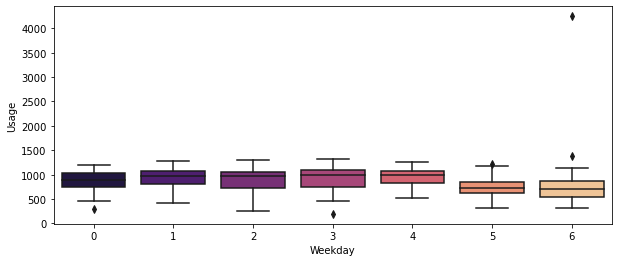

In [5]:
#group by weekday and plot
trips_hourly_engineered_weekday = trips_hourly_engineered.groupby(["day_of_year","day_of_week"])["ongoing_trips_total"].sum()
trips_hourly_engineered_weekday = pd.DataFrame(trips_hourly_engineered_weekday)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_weekday.index.get_level_values(1), y=trips_hourly_engineered_weekday["ongoing_trips_total"],ax=ax, palette="magma")
ax.set_title("", fontsize=18, fontname="Arial")
ax.set_xlabel("Weekday")
ax.set_ylabel("Usage")
plt.show()

### Hour

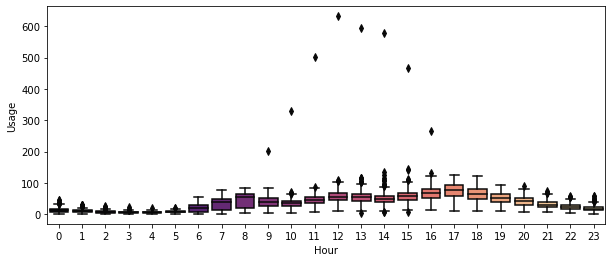

In [6]:
#group by hour and plot
trips_hourly_engineered_hour = trips_hourly_engineered.groupby(["day_of_year","hour"])["ongoing_trips_total"].sum()
trips_hourly_engineered_hour = pd.DataFrame(trips_hourly_engineered_hour)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_hour.index.get_level_values(1), y=trips_hourly_engineered_hour["ongoing_trips_total"],ax=ax, palette="magma")
ax.set_title("", fontsize=18, fontname="Arial")
ax.set_xlabel("Hour")
ax.set_ylabel("Usage")
plt.show()

### Month

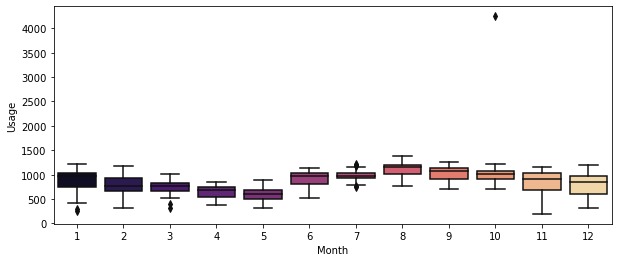

In [7]:
#group by month and plot
trips_hourly_engineered_month = trips_hourly_engineered.groupby(["day_of_year","month"])["ongoing_trips_total"].sum()
trips_hourly_engineered_month = pd.DataFrame(trips_hourly_engineered_month)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_month.index.get_level_values(1), y=trips_hourly_engineered_month["ongoing_trips_total"],ax=ax, palette="magma")
ax.set_title("", fontsize=18, fontname="Arial")
ax.set_xlabel("Month")
ax.set_ylabel("Usage")
plt.show()

### Holidays

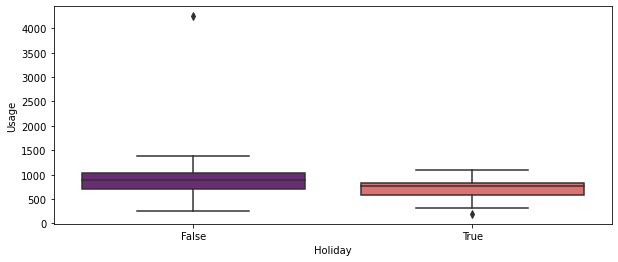

In [8]:
#group by holiday and plot
trips_hourly_engineered_holiday = trips_hourly_engineered.groupby(["day_of_year","is_holiday"])["ongoing_trips_total"].sum()
trips_hourly_engineered_holiday = pd.DataFrame(trips_hourly_engineered_holiday)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_holiday.index.get_level_values(1), y=trips_hourly_engineered_holiday["ongoing_trips_total"],ax=ax, palette="magma")
ax.set_title("", fontsize=18, fontname="Arial")
ax.set_xlabel("Holiday")
ax.set_ylabel("Usage")
plt.show()

### Weather

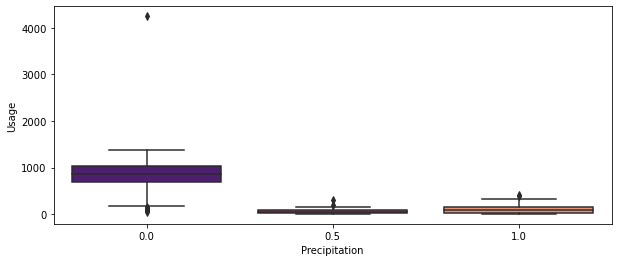

In [9]:
#group by precipitation and plot
trips_hourly_engineered_precip = trips_hourly_engineered.groupby(["day_of_year","precip"])["ongoing_trips_total"].sum()
trips_hourly_engineered_precip = pd.DataFrame(trips_hourly_engineered_precip)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_precip.index.get_level_values(1), y=trips_hourly_engineered_precip["ongoing_trips_total"],ax=ax, palette="magma")
ax.set_title("", fontsize=18, fontname="Arial")
ax.set_xlabel("Precipitation")
ax.set_ylabel("Usage")
plt.show()